In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.functions import Functions
from wrappers.visualizer import Visualizer

path_data = './data'
path_img = path_data + '/imgs'
path_csv = path_data + '/csv'
level = 'andamento-nazionale'
file_name_n = path_csv + '/covid19-' + level + '.csv'

In [2]:
df_n = pd.read_csv(file_name_n)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,totale_casi,tamponi,casi_testati,variazione_terapia_intensiva,variazione_ricoverati_con_sintomi,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,np_su_nt
0,2020-02-25T18:00:00,114,35,150,162,311,90,93,1,10,...,322,8623,NaN,9.0,13.0,0.0,3.0,4299.0,NaN,2.16
1,2020-02-26T18:00:00,128,36,164,221,385,74,78,3,12,...,400,9587,NaN,1.0,14.0,2.0,2.0,964.0,NaN,8.09
2,2020-02-27T18:00:00,248,56,304,284,588,203,250,45,17,...,650,12014,NaN,20.0,120.0,42.0,5.0,2427.0,NaN,10.30
3,2020-02-28T18:00:00,345,64,409,412,821,233,238,46,21,...,888,15695,NaN,8.0,97.0,1.0,4.0,3681.0,NaN,6.47
4,2020-02-29T18:00:00,401,105,506,543,1049,228,240,50,29,...,1128,18661,NaN,41.0,56.0,4.0,8.0,2966.0,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2020-10-18T17:00:00,7131,750,7881,118356,126237,9302,11705,251461,36543,...,414241,13540582,8199744.0,45.0,514.0,2334.0,69.0,146541.0,95554.0,7.99
237,2020-10-19T17:00:00,7676,797,8473,125530,134003,7766,9338,252959,36616,...,423578,13639444,8265568.0,47.0,545.0,1498.0,73.0,98862.0,65824.0,9.45
238,2020-10-20T17:00:00,8454,870,9324,133415,142739,8736,10874,255005,36705,...,434449,13784181,8353248.0,73.0,778.0,2046.0,89.0,144737.0,87680.0,7.51
239,2020-10-21T17:00:00,9057,926,9983,145459,155442,12703,15199,257374,36832,...,449648,13962029,8459736.0,56.0,603.0,2369.0,127.0,177848.0,106488.0,8.55


In [4]:
last_date = datetime.datetime.fromisoformat(df_n.tail(1).data.array[0])
# Define date threshold
# TODO: define function
days = 30
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n_30 = df_n[df_n.data > date_threshold_str].reset_index(drop=True)
df_n_30

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,totale_casi,tamponi,casi_testati,variazione_terapia_intensiva,variazione_ricoverati_con_sintomi,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,np_su_nt
0,2020-09-22T17:00:00,2604,239,2843,42646,45489,410,1392,219670,35738,...,300897,10575979,6391999.0,7.0,129.0,967.0,14.0,87303.0,49345.0,1.59
1,2020-09-23T17:00:00,2658,244,2902,43212,46114,625,1640,220665,35758,...,302537,10679675,6455762.0,5.0,54.0,995.0,20.0,103696.0,63763.0,1.58
2,2020-09-24T17:00:00,2731,246,2977,43803,46780,666,1786,221762,35781,...,304323,10787694,6520661.0,2.0,73.0,1097.0,23.0,108019.0,64899.0,1.65
3,2020-09-25T17:00:00,2737,244,2981,44737,47718,938,1912,222716,35801,...,306235,10894963,6584670.0,-2.0,6.0,954.0,20.0,107269.0,64009.0,1.78
4,2020-09-26T17:00:00,2746,247,2993,45600,48593,875,1869,223693,35818,...,308104,10999350,6646695.0,3.0,9.0,977.0,17.0,104387.0,62025.0,1.79
5,2020-09-27T17:00:00,2846,254,3100,46518,49618,1025,1766,224417,35835,...,309870,11087064,6700432.0,7.0,100.0,724.0,17.0,87714.0,53737.0,2.01
6,2020-09-28T17:00:00,2977,264,3241,47082,50323,705,1494,225190,35851,...,311364,11138173,6732777.0,10.0,131.0,773.0,16.0,51109.0,32345.0,2.92
7,2020-09-29T17:00:00,3048,271,3319,47311,50630,307,1648,226506,35875,...,313011,11228358,6786395.0,7.0,71.0,1316.0,24.0,90185.0,53618.0,1.83
8,2020-09-30T17:00:00,3047,280,3327,47936,51263,633,1851,227704,35894,...,314861,11333922,6848755.0,9.0,-1.0,1198.0,19.0,105564.0,62360.0,1.75
9,2020-10-01T17:00:00,3097,291,3388,49259,52647,1384,2548,228844,35918,...,317409,11452158,6916588.0,11.0,50.0,1140.0,24.0,118236.0,67833.0,2.16


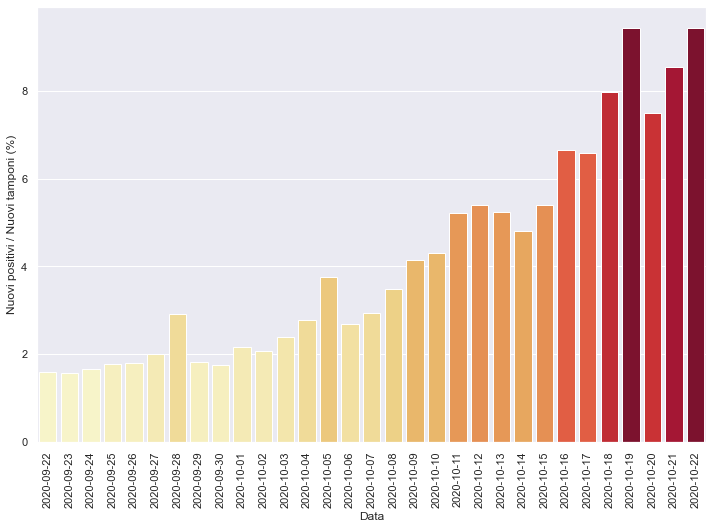

In [9]:
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='np_su_nt',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi tamponi (%)',
    x_tick_labels=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_tamponi_n_30'})

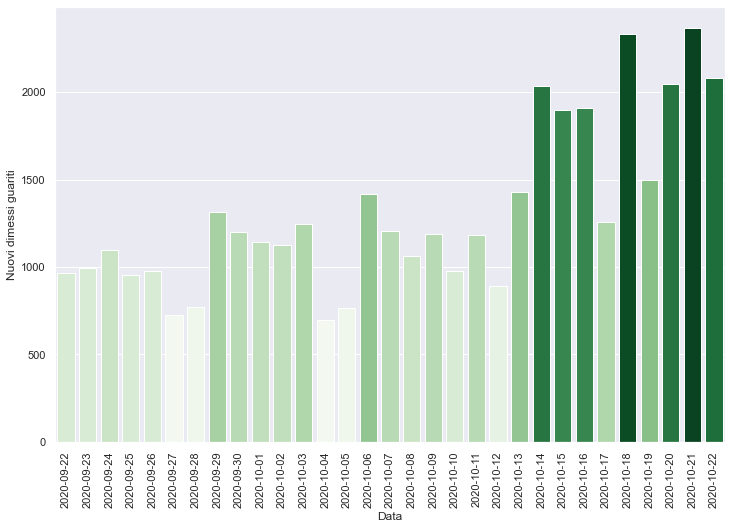

In [11]:
# New healed on a daily basis
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='nuovi_dimessi_guariti',
    x_label='Data',
    y_label='Nuovi dimessi guariti',
    x_tick_labels=df_n_30.data.apply(lambda x: x.split('T')[0]),
    color='Greens',
    save_info={'path': path_img, 'file_name': 'nuovi_dimessi_guariti_n_30'})

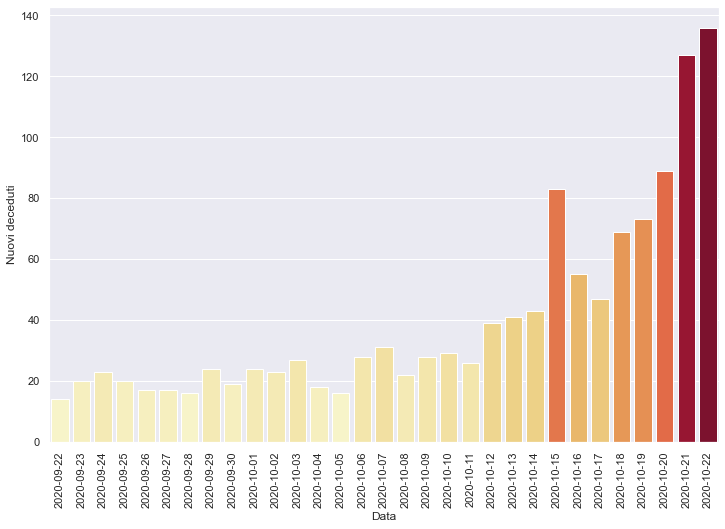

In [12]:
# New deads on a daily basis
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='nuovi_deceduti',
    x_label='Data',
    y_label='Nuovi deceduti',
    x_tick_labels=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_deceduti_n_30'})

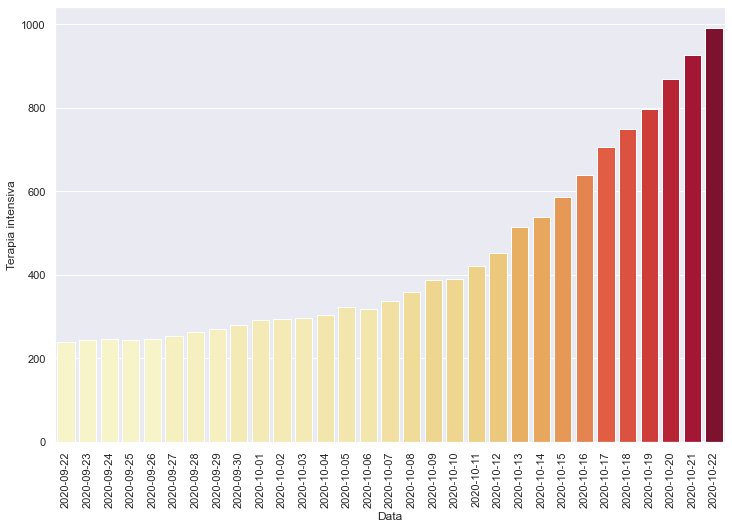

In [13]:
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='terapia_intensiva',
    x_label='Data',
    y_label='Terapia intensiva',
    x_tick_labels=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva_n_30'})

In [ ]:
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='terapia_intensiva',
    x_label='Data',
    y_label='Terapia intensiva',
    x_tick_labels=df_n_30.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'terapia_intensiva_n_30'})

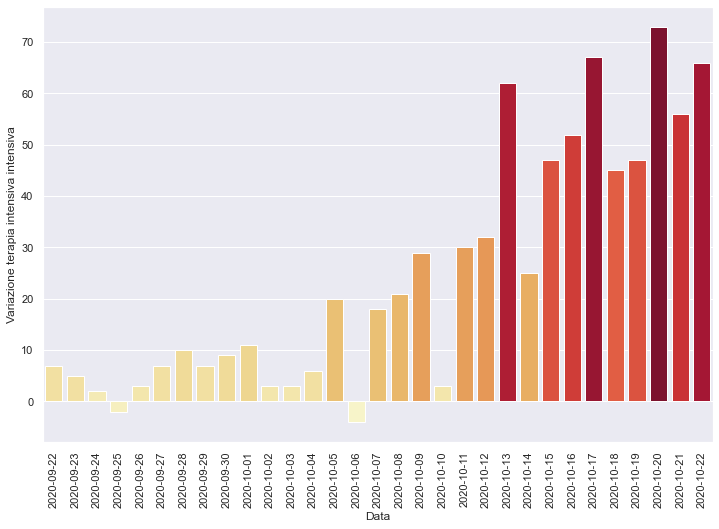

In [14]:
Visualizer.plot_hist_from_values(
    df_n_30,
    x_values='data',
    y_values='variazione_terapia_intensiva',
    x_label='Data',
    y_label='Variazione terapia intensiva intensiva',
    x_tick_labels=df_n_30.data.apply(lambda x: x.split('T')[0]))
# , save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva_n_30'}

In [15]:
days = 7
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n_7 = df_n[df_n.data > date_threshold_str].reset_index(drop=True)
df_n_7;

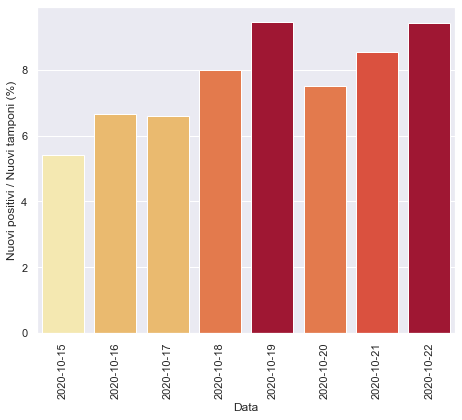

In [17]:
Visualizer.plot_hist_from_values(
    df_n_7,
    x_values='data',
    y_values='np_su_nt',
    x_label='Data',
    y_label='Nuovi positivi / Nuovi tamponi (%)',
    x_tick_labels=df_n_7.data.apply(lambda x: x.split('T')[0]),
    save_info={'path': path_img, 'file_name': 'nuovi_positivi_su_nuovi_tamponi_n_7'},
    fig_size=(7.5, 6))